In [1]:
!pip install ucimlrepo

In [2]:

import pandas as pd
from pandas import DataFrame
df=pd.read_csv('/content/diabetes_dataset.csv')
#affichage de 5 premiers lignes
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# des infos sur features

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Vérification des statistiques descriptives
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [6]:
#affichage  les valeurs manquantes
missing_values2 = df.isnull().sum()

print(missing_values2)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# gerer les valeurs aberantes
df.describe()
import pandas as pd
import numpy as np
#outliers Pregnancies
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['Pregnancies'] - df['Pregnancies'].mean()) / df['Pregnancies'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
#pas d'outliers


Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome   z_score  
88                      0.153   43        1  3.310488  
159                     0.817   47        1  3.904034  
298                     0.412   46        1  3.013715  
455                     0.212   38        1  3.013715  


In [8]:
#outliers Glucose
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['Glucose'] - df['Glucose'].mean()) / df['Glucose'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
mean_by_outcome = df.groupby('Outcome')['Glucose'].transform('mean')
df['Glucose'] = np.where(df['z_score'] > threshold, mean_by_outcome, df['Glucose'])

df.drop('z_score', axis=1, inplace=True)


Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  z_score  
75                      0.140   22        0 -3.78119  
182                     0.299   21        0 -3.78119  
342                     0.389   22        0 -3.78119  
349                     0.346   37        1 -3.78119  
502                     0.727   41        1 -3.78119  


In [9]:
#outliers BloodPressure
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['BloodPressure'] - df['BloodPressure'].mean()) / df['BloodPressure'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
#pas d'outliers


Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10    115.0              0              0        0  35.3   
15             7    100.0              0              0        0  30.0   
49             7    105.0              0              0        0   0.0   
60             2     84.0              0              0        0   0.0   
78             0    131.0              0              0        0  43.2   
81             2     74.0              0              0        0   0.0   
172            2     87.0              0             23        0  28.9   
193           11    135.0              0              0        0  52.3   
222            7    119.0              0              0        0  25.2   
261            3    141.0              0              0        0  30.0   
266            0    138.0              0              0        0  36.3   
269            2    146.0              0              0        0  27.5   
300           

In [10]:
#outliers SkinThickness
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['SkinThickness'] - df['SkinThickness'].mean()) / df['SkinThickness'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
mean_by_outcome = df.groupby('Outcome')['SkinThickness'].transform('mean')
df['BloodPressure'] = np.where(df['z_score'] > threshold, mean_by_outcome, df['SkinThickness'])

df.drop('z_score', axis=1, inplace=True)


Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2    197.0             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  z_score  
579                     0.575   62        1  4.91866  


In [11]:
#outliers Insulin
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['Insulin'] - df['Insulin'].mean()) / df['Insulin'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
mean_by_outcome = df.groupby('Outcome')['Insulin'].transform('mean')
df['Insulin'] = np.where(df['z_score'] > threshold,mean_by_outcome, df['Insulin'])


df.drop('z_score', axis=1, inplace=True)

Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2    197.0           45.0             45      543  30.5   
13             1    189.0           23.0             23      846  30.1   
111            8    155.0           26.0             26      495  34.0   
153            1    153.0           42.0             42      485  40.6   
186            8    181.0           36.0             36      495  30.1   
220            0    177.0           29.0             29      478  34.6   
228            4    197.0           39.0             39      744  36.7   
247            0    165.0           33.0             33      680  52.3   
286            5    155.0           44.0             44      545  38.7   
370            3    173.0           48.0             48      465  38.4   
409            1    172.0           49.0             49      579  42.4   
415            3    173.0           33.0             33      474  35.7   
486           

In [12]:
#outliers BMI
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['BMI'] - df['BMI'].mean()) / df['BMI'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
mean_by_outcome = df.groupby('Outcome')['BMI'].transform('mean')
df['BMI'] = np.where(df['z_score'] > threshold, mean_by_outcome, df['BMI'])

df.drop('z_score', axis=1, inplace=True)

Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
9              8    125.0            0.0              0      0.0   0.0   
49             7    105.0            0.0              0      0.0   0.0   
60             2     84.0            0.0              0      0.0   0.0   
81             2     74.0            0.0              0      0.0   0.0   
145            0    102.0           23.0             23      0.0   0.0   
177            0    129.0           46.0             46    130.0  67.1   
371            0    118.0           23.0             23     89.0   0.0   
426            0     94.0            0.0              0      0.0   0.0   
445            0    180.0           63.0             63     14.0  59.4   
494            3     80.0            0.0              0      0.0   0.0   
522            6    114.0            0.0              0      0.0   0.0   
673            3    123.0           35.0             35    240.0  57.3   
684           

In [13]:
import pandas as pd
import numpy as np

# Calcul du Z-score pour détecter les outliers
threshold = 3
df['z_score'] = (df['DiabetesPedigreeFunction'] - df['DiabetesPedigreeFunction'].mean()) / df['DiabetesPedigreeFunction'].std()

# Identifier les outliers
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)

# Calcul de la moyenne de 'DiabetesPedigreeFunction' pour chaque classe 'Outcome'
mean_by_outcome = df.groupby('Outcome')['DiabetesPedigreeFunction'].transform('mean')

# Remplacer les outliers par la moyenne de leur classe
df['DiabetesPedigreeFunction'] = np.where(np.abs(df['z_score']) > threshold, mean_by_outcome, df['DiabetesPedigreeFunction'])

# Vérification du remplacement
print("DataFrame après le remplacement des outliers :")
print(df[['Outcome', 'DiabetesPedigreeFunction']])


Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
4              0    137.0           35.0             35  168.000000   
45             0    180.0           39.0             39    0.000000   
58             0    146.0            0.0              0    0.000000   
228            4    197.0           39.0             39   68.792000   
330            8    118.0           19.0             19    0.000000   
370            3    173.0           48.0             48  100.335821   
371            0    118.0           23.0             23   89.000000   
395            2    127.0           24.0             24  275.000000   
445            0    180.0           63.0             63   14.000000   
593            2     82.0           22.0             22  115.000000   
621            2     92.0           20.0             20    0.000000   

           BMI  DiabetesPedigreeFunction  Age  Outcome   z_score  
4    43.100000                     2.288   33        1  

In [14]:
#outliers Age
# Calcul du Z-score
threshold = 3
df['z_score'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
outliers_z_score = df[np.abs(df['z_score']) > threshold]
print("Outliers avec Z-score :")
print(outliers_z_score)
mean_by_outcome = df.groupby('Outcome')['Age'].transform('mean')
df['Age'] = np.where(df['z_score'] > threshold, mean_by_outcome, df['Age'])

df.drop('z_score', axis=1, inplace=True)

Outliers avec Z-score :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123            5    132.0            0.0              0      0.0  26.8   
453            2    119.0            0.0              0      0.0  19.6   
459            9    134.0           33.0             33     60.0  25.9   
666            4    145.0           18.0             18      0.0  32.5   
684            5    136.0            0.0              0      0.0   0.0   

     DiabetesPedigreeFunction  Age  Outcome   z_score  
123                     0.186   69        0  3.040681  
453                     0.832   72        0  3.295778  
459                     0.460   81        0  4.061069  
666                     0.235   70        1  3.125714  
684                     0.640   69        0  3.040681  


In [15]:
#correlation
df.iloc[:,0:9].corr()
#on remarque une forte correlation positive entre BloodPressure et SkinThickness
#on remarque une correlation positive moyenne entre  Pregnancies et age , BloodPressure	et Insulin


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,-0.079498,-0.081672,-0.065735,0.030250,0.005624,0.555918,0.221898
Glucose,0.129459,1.000000,0.043065,0.057328,0.255976,0.218076,0.105363,0.265150,0.466581
BloodPressure,-0.079498,0.043065,1.000000,0.984780,0.470967,0.383760,0.163069,-0.123024,0.067250
SkinThickness,-0.081672,0.057328,0.984780,1.000000,0.458549,0.379961,0.163253,-0.104975,0.074752
Insulin,-0.065735,0.255976,0.470967,0.458549,1.000000,0.175732,0.185749,-0.066501,0.095808
BMI,0.030250,0.218076,0.383760,0.379961,0.175732,1.000000,0.138514,0.082442,0.291360
DiabetesPedigreeFunction,0.005624,0.105363,0.163069,0.163253,0.185749,0.138514,1.000000,0.063130,0.196112
Age,0.555918,0.265150,-0.123024,-0.104975,-0.066501,0.082442,0.063130,1.000000,0.256351
Outcome,0.221898,0.466581,0.067250,0.074752,0.095808,0.291360,0.196112,0.256351,1.000000


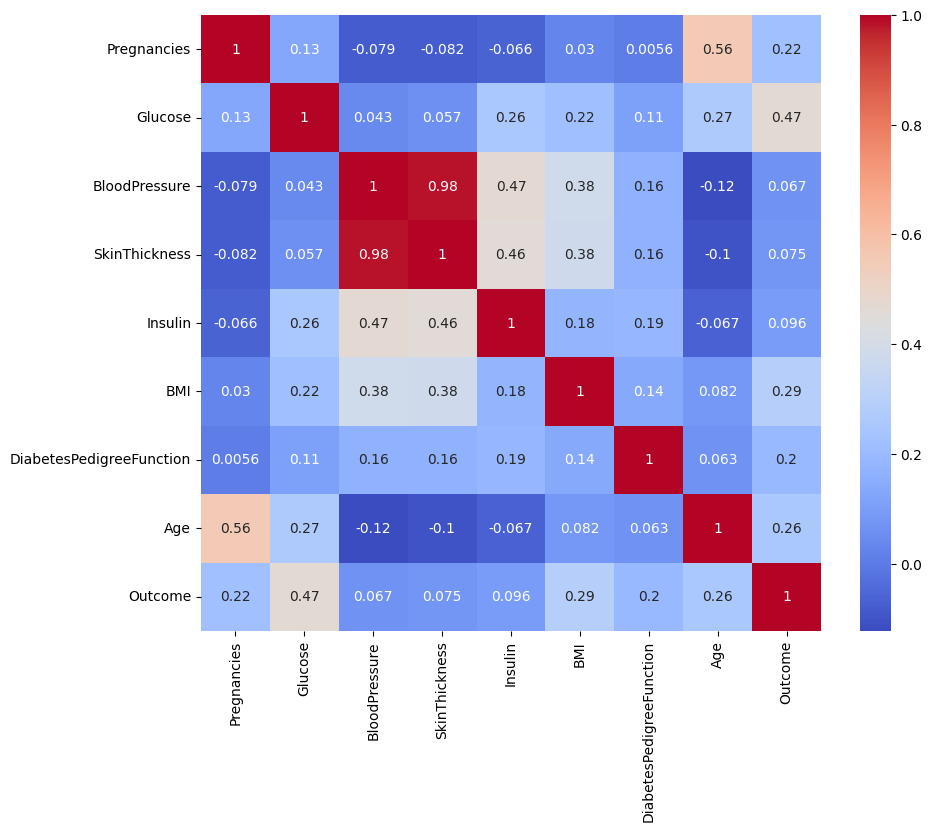

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Standardisation des données avant de calculer le VIF
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

                   Variable        VIF
0               Pregnancies   1.461576
1                   Glucose   1.231636
2             BloodPressure  34.886823
3             SkinThickness  33.891197
4                   Insulin   1.423961
5                       BMI   1.251531
6  DiabetesPedigreeFunction   1.059380
7                       Age   1.590168


In [18]:

# suppression de SkinThickness afin de reduire la colliniarité


df = df.drop(columns=['SkinThickness'])


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Division des données
X = X_scaled
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entraînement et évaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Affichage des résultats
for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.2f}")
#on choisit logistic regression car combine entre la bonne accuracy et la facilité de deploiement

Logistic Regression: Accuracy = 0.75
Decision Tree: Accuracy = 0.72
Random Forest: Accuracy = 0.73
SVM: Accuracy = 0.74
KNN: Accuracy = 0.68


In [20]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100, 200]}

# Recherche avec validation croisée
grid_search = GridSearchCV(LogisticRegression(penalty='l2',class_weight='balanced', max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleur paramètre C :", grid_search.best_params_['C'])
print("Meilleure précision :", grid_search.best_score_)


Meilleur paramètre C : 0.1
Meilleure précision : 0.7605757696921231


In [21]:
from sklearn.linear_model import LogisticRegression

# Modèle avec régularisation L2
model = LogisticRegression(penalty='l2',class_weight='balanced', C=0.1,max_iter=1000, random_state=42)
# 4 - Validation Croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy pour chaque fold :", cv_scores)
print("Accuracy moyenne (cross-validation) :", cv_scores.mean())
model.fit(X_train, y_train)
y_proba=model.predict(X_test)

Accuracy pour chaque fold : [0.76422764 0.78861789 0.7398374  0.75609756 0.75409836]
Accuracy moyenne (cross-validation) : 0.7605757696921231


In [24]:
# Tester plusieurs seuils
from sklearn.metrics import precision_score, recall_score, accuracy_score , f1_score
seuils = [0.2,0.3, 0.5, 0.7,0.8]
for seuil in seuils:
    y_pred = (y_proba >= seuil).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nSeuil {seuil}:")
    print(f"Précision : {accuracy:.2f}")
    print(f"Précision (Precision) : {precision:.2f}")
    print(f"Rappel (Recall) : {recall:.2f}")
    print(f"Score F1 : {f1:.2f}")




Seuil 0.2:
Précision : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65

Seuil 0.3:
Précision : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65

Seuil 0.5:
Précision : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65

Seuil 0.7:
Précision : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65

Seuil 0.8:
Précision : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65


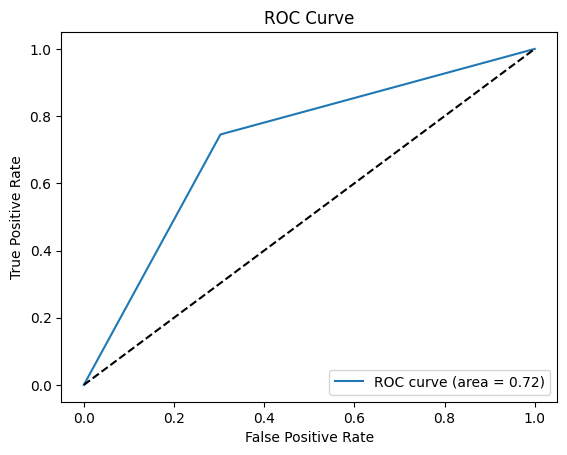

Seuil optimal basé sur la courbe ROC : 1.00


In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Trouver le seuil optimal (par exemple, celui qui maximise TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Seuil optimal basé sur la courbe ROC : {optimal_threshold:.2f}")



In [34]:
# Appliquer le seuil optimal
seuil_optimal = 0.7
y_pred_optimal = (y_proba >= seuil_optimal).astype(int)

# Évaluation avec le seuil optimal
accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)

print(f"Précision avec seuil optimal {seuil_optimal} : {accuracy:.2f}")
print(f"Précision (Precision) : {precision:.2f}")
print(f"Rappel (Recall) : {recall:.2f}")
print(f"Score F1 : {f1:.2f}")


Précision avec seuil optimal 0.7 : 0.71
Précision (Precision) : 0.58
Rappel (Recall) : 0.75
Score F1 : 0.65


In [35]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_optimal)
print("Matrice de confusion :\n", cm)

Matrice de confusion :
 [[69 30]
 [14 41]]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # évite warnings
model.fit(X_train, y_train)

# 4. Prédire
y_pred = model.predict(X_test)

# 5. Évaluer
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:27:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Matrice de confusion:
 [[75 24]
 [17 38]]


In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Créer le modèle
model = XGBClassifier()

# Appliquer GridSearchCV pour tester les différentes combinaisons d'hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Entraîner avec la recherche des meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)


Meilleurs paramètres :  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [39]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entraînement
xgb.fit(X_train, y_train)

# Prédiction
y_pred = xgb.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:35:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Matrice de confusion :
 [[76 23]
 [18 37]]


In [68]:
from sklearn.metrics import classification_report

# Prédictions de probabilités
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1 (diabétique)

# Choisir un seuil
seuil = 0.3
y_pred_adjusted = (y_pred_proba >= seuil).astype(int)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_adjusted))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.82      0.65      0.72        99
           1       0.54      0.75      0.63        55

    accuracy                           0.68       154
   macro avg       0.68      0.70      0.67       154
weighted avg       0.72      0.68      0.69       154

Matrice de confusion :
 [[64 35]
 [14 41]]


In [69]:
pip install imbalanced-learn xgboost scikit-learn


In [71]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Séparer X et y

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Appliquer SMOTE uniquement sur le jeu d'entraînement
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Définir le modèle avec ses hyperparamètres
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    scale_pos_weight=1.8,  # important pour les classes déséquilibrées
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Entraîner le modèle
xgb_model.fit(X_train_res, y_train_res)

# Prédictions
y_pred = xgb_model.predict(X_test)

# Évaluer le modèle
print(classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.92      0.70      0.80       100
           1       0.62      0.89      0.73        54

    accuracy                           0.77       154
   macro avg       0.77      0.79      0.76       154
weighted avg       0.81      0.77      0.77       154

Matrice de confusion :
 [[70 30]
 [ 6 48]]


In [72]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# Créer le modèle
model = XGBClassifier()

# Appliquer GridSearchCV pour tester les différentes combinaisons d'hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Entraîner avec la recherche des meilleurs paramètres
grid_search.fit(X_train_res, y_train_res)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)


Meilleurs paramètres :  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}


In [73]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=7,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entraînement
xgb.fit(X_train, y_train)

# Prédiction
y_pred = xgb.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.62      0.59      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Matrice de confusion :
 [[80 20]
 [22 32]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sauvegarder dans Google Drive
model_path = '/content/drive/My Drive/logistic_regression_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)



MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install flask-ngrok



In [75]:
import pickle

# Sauvegarde du modèle
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

# Télécharger le fichier sur votre machine locale
from google.colab import files
files.download('xgb.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install flask-ngrok

from flask import Flask
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Cette ligne est cruciale pour utiliser Ngrok

@app.route("/")
def hello():
    return "Hello from Flask via Ngrok!"

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
import numpy as np

# Charger le modèle sauvegardé
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

app = Flask(__name__)
run_with_ngrok(app)  # Pour exécuter sur Colab via Ngrok

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll